# Weather Dataset - Temperature Prediction

In [101]:
# Importing the necessary modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
from statsmodels.graphics.gofplots import qqplot
import statistics 
import scipy
import math
import seaborn as sns
%matplotlib inline

In [102]:
# Importing dataset into data frame variable
df = pd.read_csv("WeatherHistoryDataset.csv")

#printing the first 5 rows of the dataset
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature ©,Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2012-04-01 00:00:00.000 +0200,Breezy and Overcast,rain,9.444444,5.511111111,0.52,35.42,340,16.1,0,1002.8,Partly cloudy until evening and breezy in the ...
1,2012-04-01 01:00:00.000 +0200,Mostly Cloudy,rain,8.333333,5.194444444,0.45,20.93,320,16.1,0,1004.1,Partly cloudy until evening and breezy in the ...
2,2012-04-01 02:00:00.000 +0200,Breezy and Mostly Cloudy,rain,6.855556,2.244444444,0.54,33.2304,322,15.1501,0,1004.97,Partly cloudy until evening and breezy in the ...
3,2012-04-01 03:00:00.000 +0200,Mostly Cloudy,rain,6.111111,1.888888889,0.57,25.76,310,16.1,0,1005.9,Partly cloudy until evening and breezy in the ...
4,2012-04-01 04:00:00.000 +0200,Breezy and Overcast,rain,6.111111,1.605555556,0.51,28.98,310,16.1,0,1006,Partly cloudy until evening and breezy in the ...


In [103]:
# Finding out the general information about the dataset
df.describe()

,Temperature (C),Loud Cover
count,35077.000000,35077.0
mean,12.190872,0.0
std,9.549309,0.0
min,-21.822222,0.0
25%,4.911111,0.0
50%,12.150000,0.0
75%,18.894444,0.0
max,38.861111,0.0


In [104]:
# Since the NaN values are represented as " " it has to be converted to NaN value so that we can clean the data efficiently
df = df.replace(" ", np.nan)

In [105]:
# Counting the number of NaN values through each column
df.isnull().sum()

Formatted Date              0
Summary                   203
Precip Type               144
Temperature (C)             0
Apparent Temperature ©    199
Humidity                  144
Wind Speed (km/h)         260
Wind Bearing (degrees)    178
Visibility (km)           253
Loud Cover                  0
Pressure (millibars)      159
Daily Summary               0
dtype: int64

# Exploratory Data Analysis:

### _Description_: 

- **Formatted Date**: Date in yyyy-mm-dd hr(in 24 hr format) format.
- **Summary**: Summary of weather.
- **Precip Type**: Type of precipitation.
- **Temperature**: Temperature in degrees Centigrade.
- **Apparent Temperature Â©**: Apparent temperature in degrees Centigrade.
- **humidity**: Humidity at recorded time.
- **Wind Speed**: Wind speed in km/hrs.
- **Wind Bearing**: Wind Bearing in degrees.
- **Visibility**: Visibility in km.
- **Loud Cover**: No useful information that can be made out.
- **Pressure**: Pressure in millibars.
- **Daily Summary**: Present day's summary. 

In [106]:
# Removing rows where the Precip type and Summary is NaN

df = df[df["Precip Type"].notna()]
df = df[df["Summary"].notna()]

In [107]:
# Dropping the Loud Cover column as it does not contain useful information

df.drop('Loud Cover', inplace=True, axis=1)

In [108]:
# Imputing the NaN values with the mean strategy 

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = imputer.fit(df.iloc[:,4:10].values)
df.iloc[:,4:10] = imputer.transform(df.iloc[:,4:10].values)

In [109]:
# Removing the duplicate rows

df.drop_duplicates(subset ="Formatted Date", keep = False, inplace = True)

## Removal of outliers

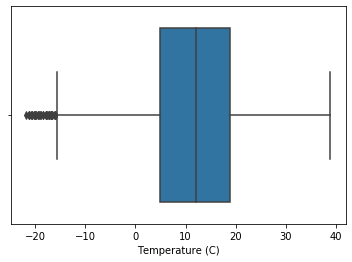

In [110]:
import seaborn as sns

# Visualizing the data in boxplots to get information on the outliers
sns.boxplot(x=df['Temperature (C)'])    

In [111]:
# Removal of outliers 
Q1 = df['Temperature (C)'].quantile(0.25)   #first quartile
Q3 = df['Temperature (C)'].quantile(0.75)   #third quartile
IQR = Q3 - Q1   #IQR-> Interquartile Range

filter = (df['Temperature (C)'] >= Q1 - 1.5 * IQR) & (df['Temperature (C)'] <= Q3 + 1.5 *IQR)
df = df.loc[filter]  

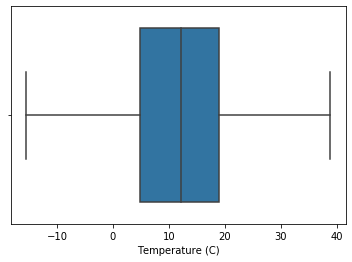

In [112]:
sns.boxplot(x=df['Temperature (C)'])    

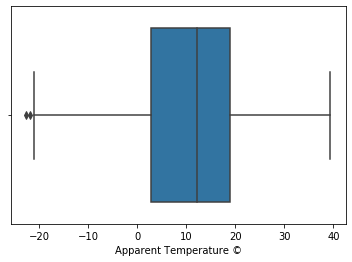

In [113]:
sns.boxplot(x=df['Apparent Temperature ©'])

In [114]:
Q1 = df['Apparent Temperature ©'].quantile(0.25)
Q3 = df['Apparent Temperature ©'].quantile(0.75)
IQR = Q3 - Q1     

filter = (df['Apparent Temperature ©'] >= Q1 - 1.5 * IQR) & (df['Apparent Temperature ©'] <= Q3 + 1.5 *IQR)
df = df.loc[filter]  

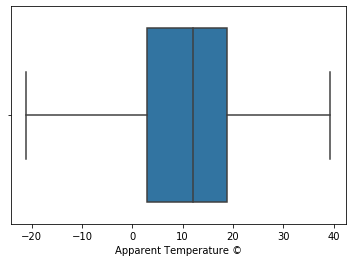

In [115]:
sns.boxplot(x=df['Apparent Temperature ©'])

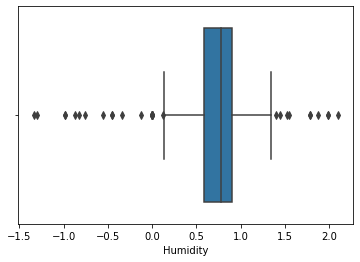

In [116]:
sns.boxplot(x=df['Humidity'])

In [117]:
Q1 = df['Humidity'].quantile(0.25)
Q3 = df['Humidity'].quantile(0.75)
IQR = Q3 - Q1     

filter = (df['Humidity'] >= Q1 - 1.5 * IQR) & (df['Humidity'] <= Q3 + 1.5 *IQR)
df = df.loc[filter]  

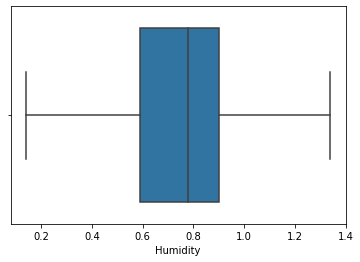

In [118]:
sns.boxplot(x=df['Humidity'])

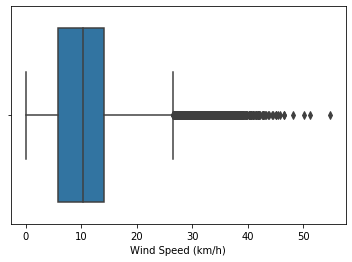

In [119]:
sns.boxplot(x=df['Wind Speed (km/h)'])

In [120]:
Q1 = df['Wind Speed (km/h)'].quantile(0.25)
Q3 = df['Wind Speed (km/h)'].quantile(0.75)
IQR = Q3 - Q1     

filter = (df['Wind Speed (km/h)'] >= Q1 - 1.5 * IQR) & (df['Wind Speed (km/h)'] <= Q3 + 1.5 *IQR)
df = df.loc[filter]  

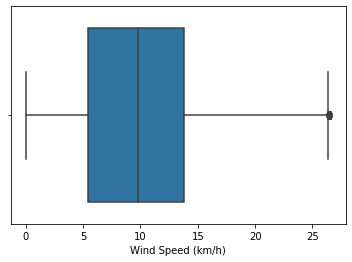

In [121]:
sns.boxplot(x=df['Wind Speed (km/h)'])

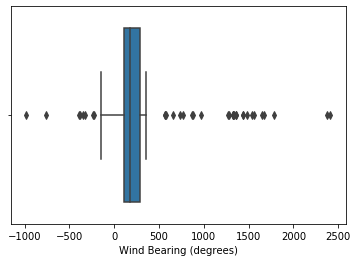

In [122]:
sns.boxplot(x=df['Wind Bearing (degrees)'])

In [123]:
Q1 = df['Wind Bearing (degrees)'].quantile(0.25)
Q3 = df['Wind Bearing (degrees)'].quantile(0.75)
IQR = Q3 - Q1     

filter = (df['Wind Bearing (degrees)'] >= Q1 - 1.5 * IQR) & (df['Wind Bearing (degrees)'] <= Q3 + 1.5 *IQR)
df = df.loc[filter]  

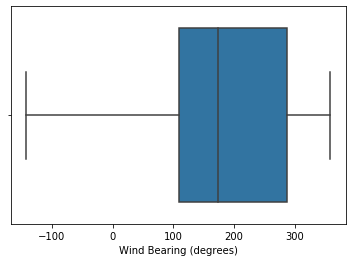

In [124]:
sns.boxplot(x=df['Wind Bearing (degrees)'])

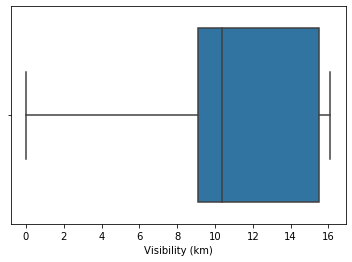

In [125]:
sns.boxplot(x=df['Visibility (km)'])

In [126]:
Q1 = df['Visibility (km)'].quantile(0.25)
Q3 = df['Visibility (km)'].quantile(0.75)
IQR = Q3 - Q1     

filter = (df['Visibility (km)'] >= Q1 - 1.5 * IQR) & (df['Visibility (km)'] <= Q3 + 1.5 *IQR)
df = df.loc[filter]  

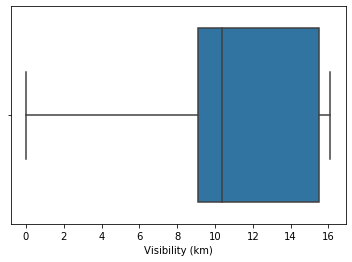

In [127]:
sns.boxplot(x=df['Visibility (km)'])

In [128]:
df['Pressure (millibars)']=df['Pressure (millibars)'].astype(float)   #converting to float type

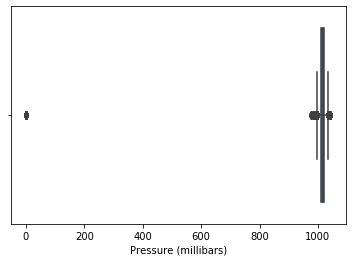

In [129]:
sns.boxplot(x=df['Pressure (millibars)'])

In [130]:
Q1 = df['Pressure (millibars)'].quantile(0.25)
Q3 = df['Pressure (millibars)'].quantile(0.75)
IQR = Q3 - Q1     

filter = (df['Pressure (millibars)'] >= Q1 - 1.5 * IQR) & (df['Pressure (millibars)'] <= Q3 + 1.5 *IQR)
df = df.loc[filter]  


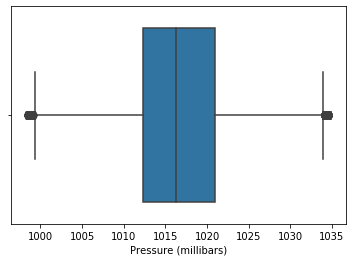

In [131]:
sns.boxplot(x=df['Pressure (millibars)'])

In [132]:
# outliers removed
df

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature ©,Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
1,2012-04-01 01:00:00.000 +0200,Mostly Cloudy,rain,8.333333,5.194444,0.450000,20.9300,320.0,16.1000,1004.10,Partly cloudy until evening and breezy in the ...
3,2012-04-01 03:00:00.000 +0200,Mostly Cloudy,rain,6.111111,1.888889,0.570000,25.7600,310.0,16.1000,1005.90,Partly cloudy until evening and breezy in the ...
6,2012-04-01 06:00:00.000 +0200,Mostly Cloudy,rain,3.888889,-0.805556,0.731044,24.1500,330.0,9.9820,1008.30,Partly cloudy until evening and breezy in the ...
7,2012-04-01 07:00:00.000 +0200,Mostly Cloudy,rain,2.777778,-2.038889,0.520000,22.5400,320.0,9.9820,1010.30,Partly cloudy until evening and breezy in the ...
11,2012-04-01 11:00:00.000 +0200,Partly Cloudy,rain,7.711111,3.900000,0.380000,26.3235,329.0,10.3684,1012.74,Partly cloudy until evening and breezy in the ...
...,...,...,...,...,...,...,...,...,...,...,...
35072,2015-09-09 19:00:00.000 +0200,Partly Cloudy,rain,16.011111,16.011111,0.460000,0.1288,340.0,16.1000,1019.23,Partly cloudy starting in the morning continui...
35073,2015-09-09 20:00:00.000 +0200,Partly Cloudy,rain,13.061111,13.061111,0.550000,6.9552,331.0,15.5526,1019.81,Partly cloudy starting in the morning continui...
35074,2015-09-09 21:00:00.000 +0200,Partly Cloudy,rain,11.161111,11.161111,0.670000,7.9212,352.0,16.1000,1020.33,Partly cloudy starting in the morning continui...
35075,2015-09-09 22:00:00.000 +0200,Clear,rain,10.583333,10.583333,0.690000,6.4239,342.0,16.1000,1019.75,Partly cloudy starting in the morning continui...


# Graph Visualisation - BAR GRAPH

### 1. Visibility vs precip type

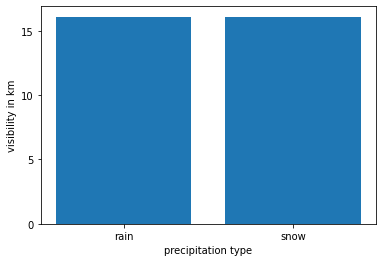

In [33]:
plt.bar(x=df['Precip Type'], height=df['Visibility (km)']) 
plt.xlabel('precipitation type')
plt.ylabel('visibility in km') 
plt.rcParams['font.size'] = 20

### 2. Wind speed vs Summary

Text(0, 0.5, 'windspeed (km/h)')

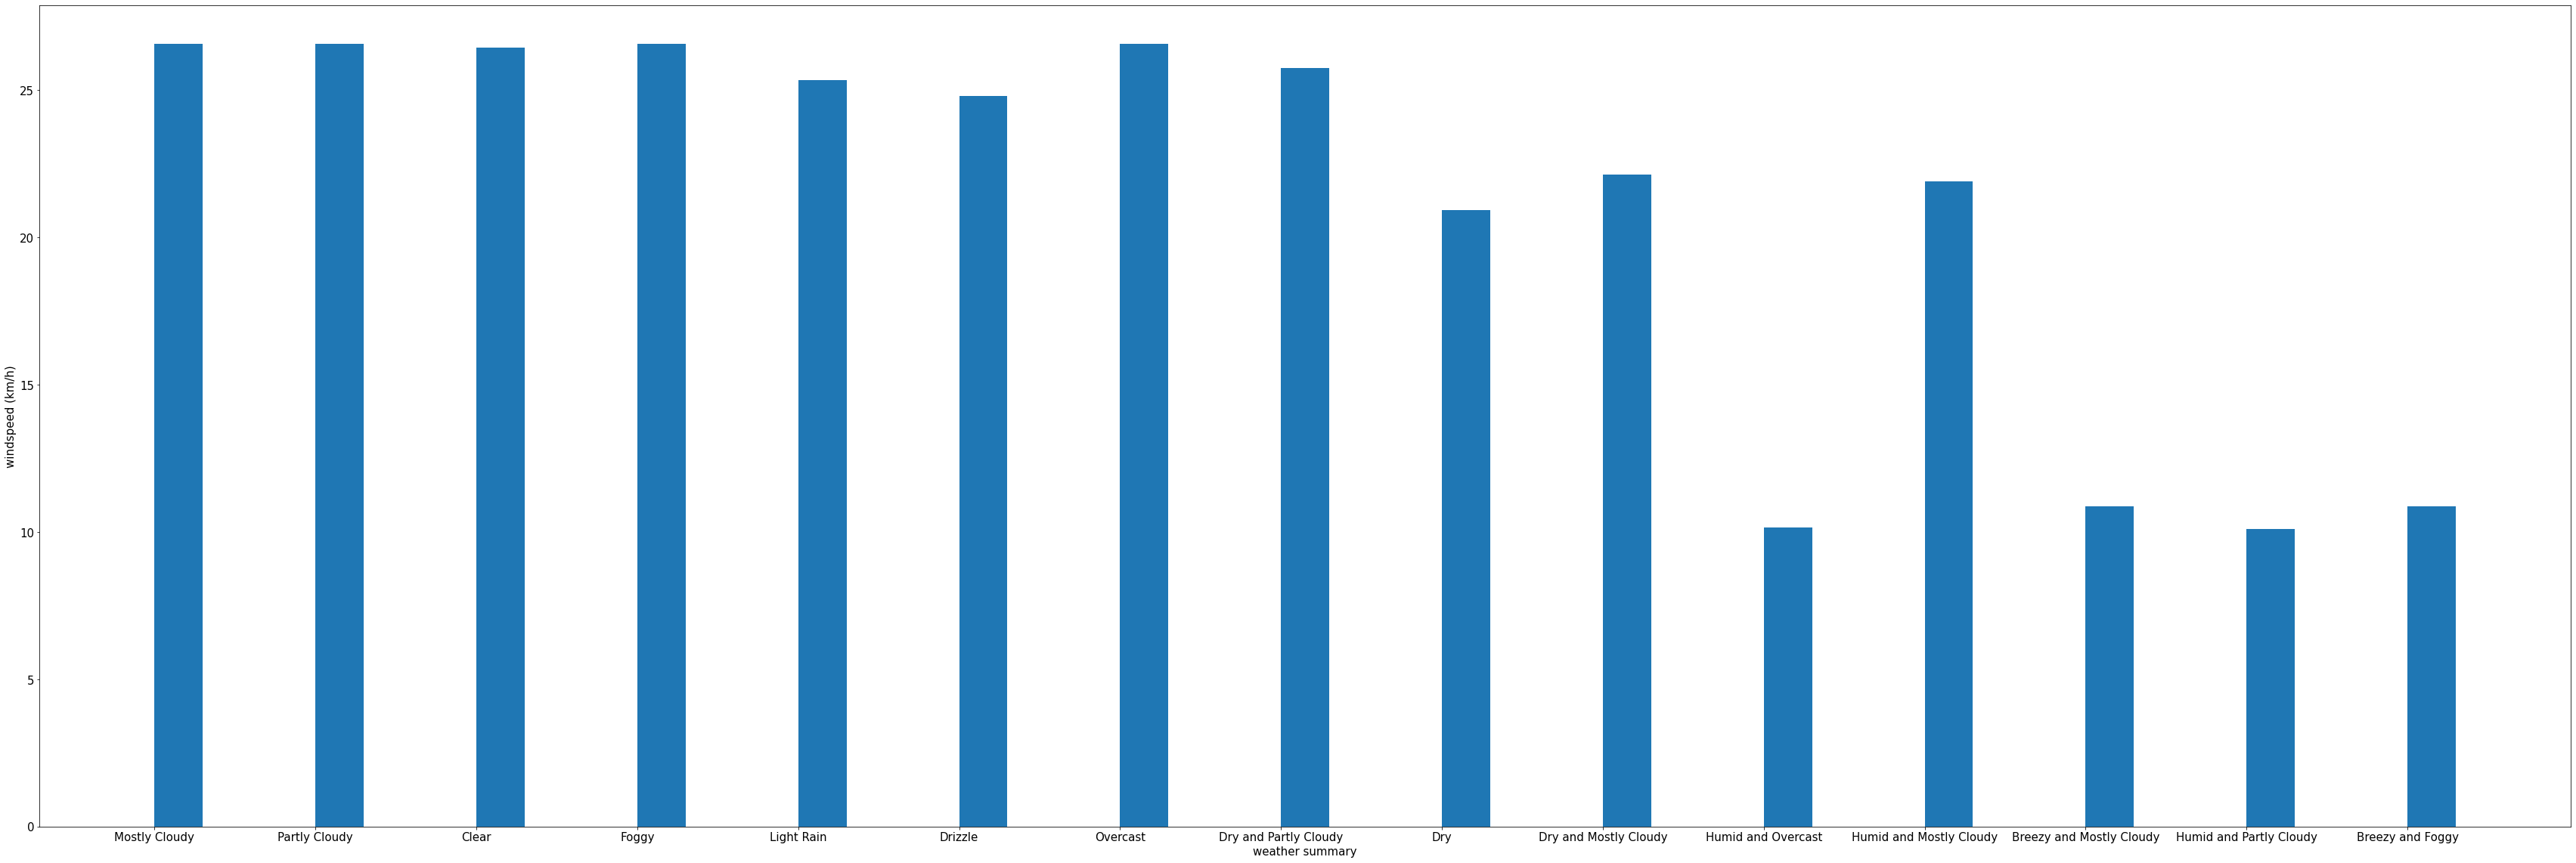

In [40]:
plt.rcParams['figure.figsize'] = (60,20)
plt.bar(x=df['Summary'], height=df['Wind Speed (km/h)'], align='edge', width=0.3)
plt.xlabel('weather summary')
plt.ylabel('windspeed (km/h)') 

## 3. Visibility vs Summary

Text(0, 0.5, 'visibility in km')

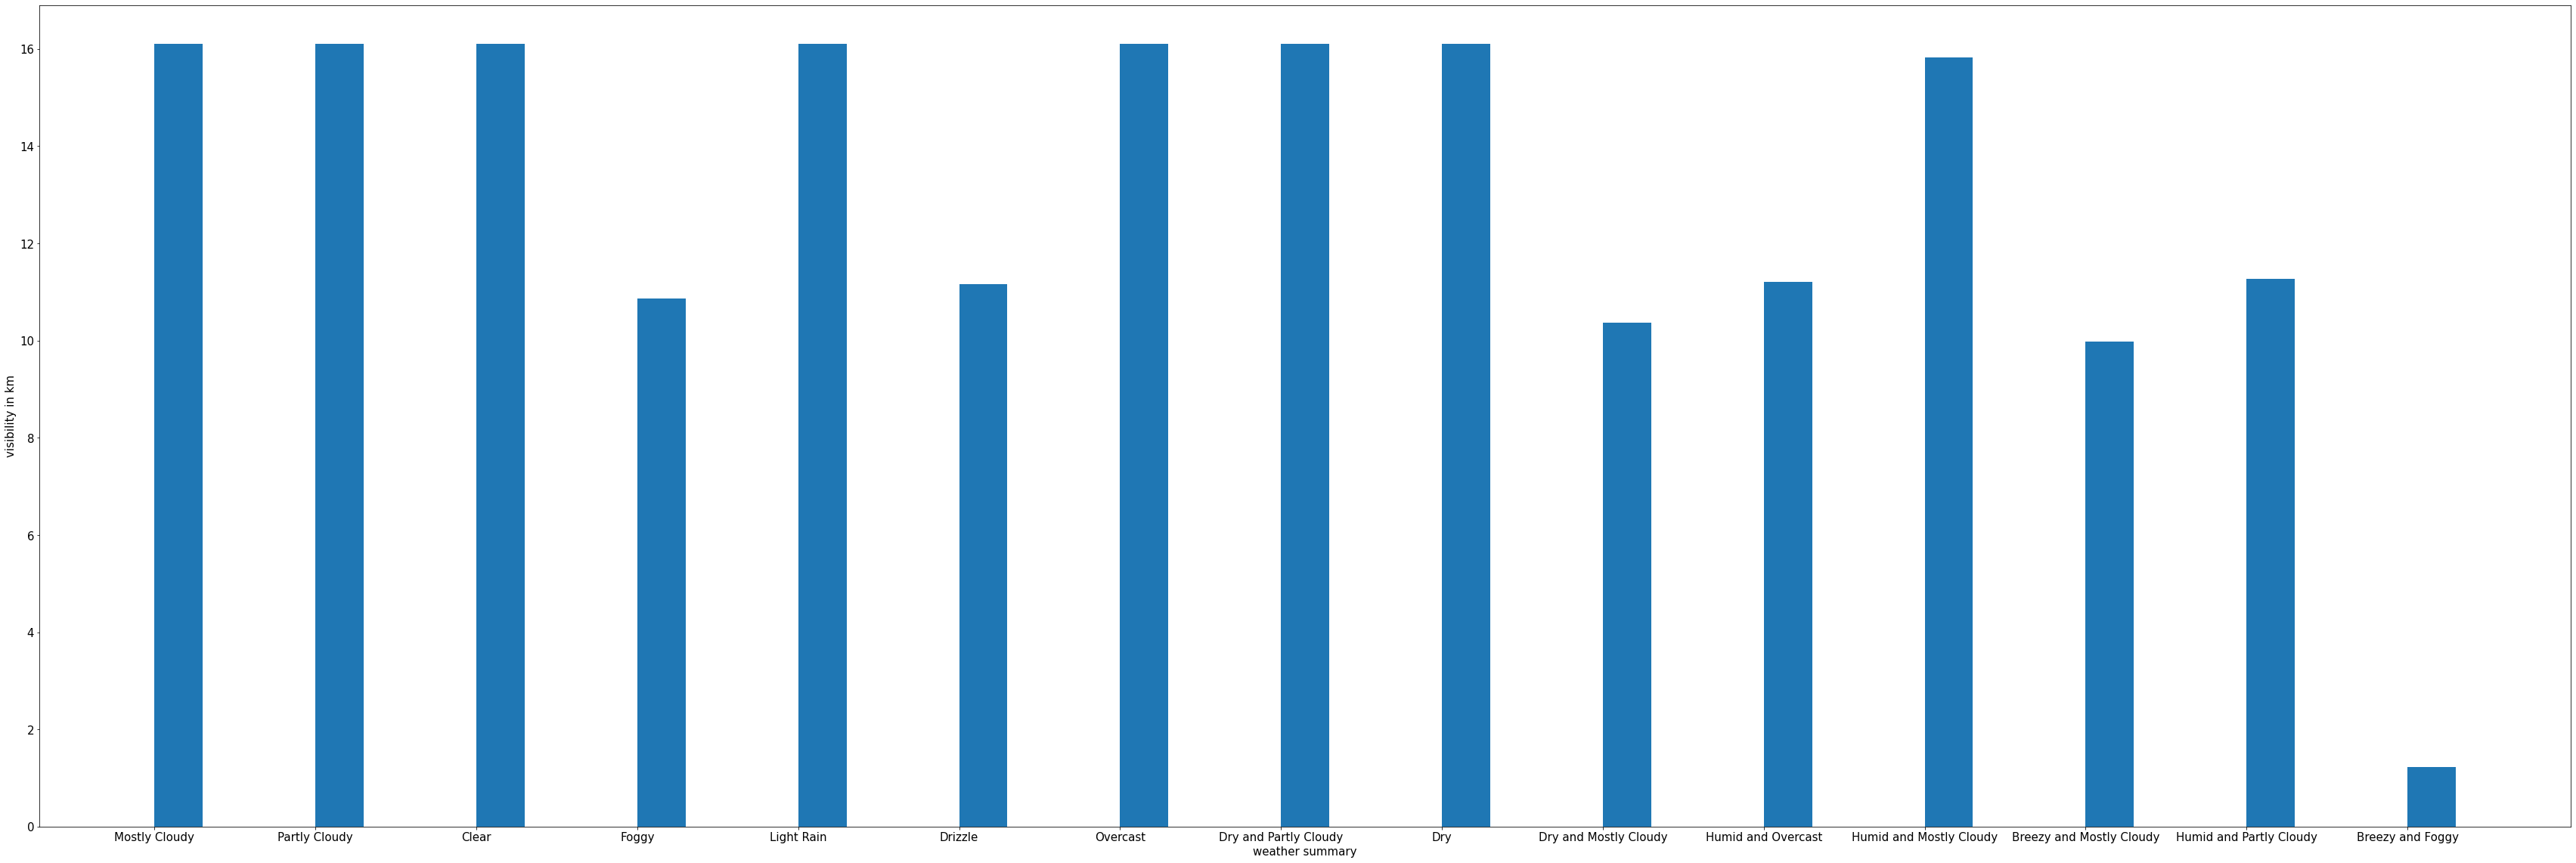

In [42]:
plt.rcParams['figure.figsize'] = (60,20)
plt.bar(x=df['Summary'], height=df['Visibility (km)'], align='edge', width=0.3)
plt.xlabel('weather summary')
plt.ylabel('visibility in km') 

In [ ]:
# Preparing the Label Encoder

le = preprocessing.LabelEncoder()

# Encoding the values of Precip Type and Summary to unique values so that we can use them for analysis

df["Precip Type"] = le.fit_transform(df["Precip Type"])
df["Summary"] = le.fit_transform(df["Summary"])

### 4. Temperature vs Date

<BarContainer object of 31796 artists>

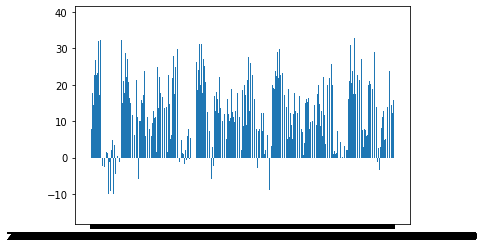

In [34]:
plt.bar(x=df['Formatted Date'], height=df['Temperature (C)'])  

### 5. Humidatity vs Date

<BarContainer object of 31796 artists>

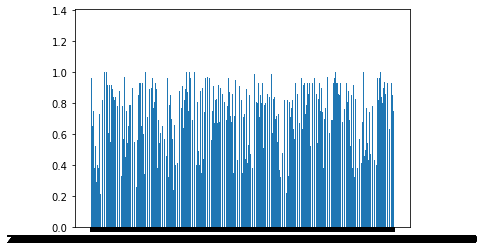

In [35]:
plt.bar(x=df['Formatted Date'], height=df['Humidity'])

# Normalization and Standardization

In [133]:
# Calculating mean of all required columns
df[['Temperature (C)', 'Apparent Temperature ©', 'Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)']].mean()

Temperature (C)             12.677395
Apparent Temperature ©      11.736231
Humidity                     0.730901
Wind Speed (km/h)           10.151795
Wind Bearing (degrees)     183.649361
Visibility (km)             11.029687
Pressure (millibars)      1016.667810
dtype: float64

In [134]:
# Calculating variance of all required columns
df[['Temperature (C)','Apparent Temperature ©', 'Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)']].var()

Temperature (C)              89.044259
Apparent Temperature ©      109.531888
Humidity                      0.040541
Wind Speed (km/h)            34.233790
Wind Bearing (degrees)    11663.676822
Visibility (km)              19.631730
Pressure (millibars)         47.672279
dtype: float64

In [135]:
# Data before normalization

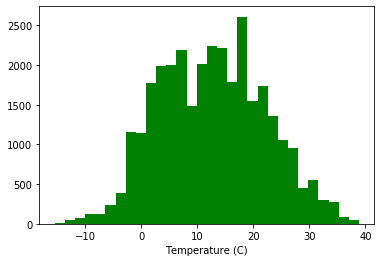

In [136]:
plt.hist(df['Temperature (C)'], 30, facecolor='green')
plt.xlabel('Temperature (C)')
plt.show()

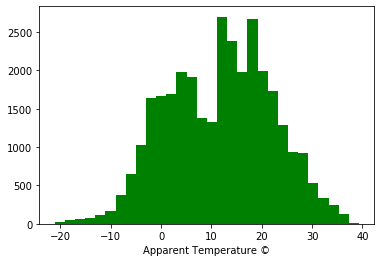

In [137]:
plt.hist(df['Apparent Temperature ©'], 30, facecolor='green')
plt.xlabel('Apparent Temperature ©')
plt.show()

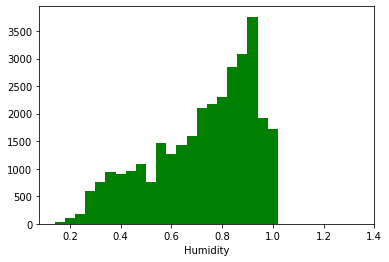

In [138]:
plt.hist(df['Humidity'], 30, facecolor='green')
plt.xlabel('Humidity')
plt.show()

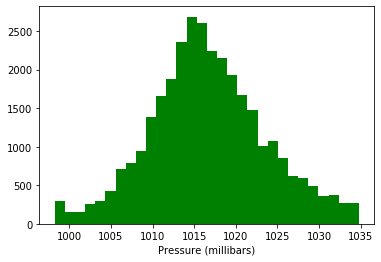

In [139]:
plt.hist(df['Pressure (millibars)'], 30, facecolor='green')
plt.xlabel('Pressure (millibars)')
plt.show()

## Need for Normalization and it's effects on the Dataset

    -> In the context of machine learning and data science, normalization takes the values from the database and where they are numeric columns, changes them into a common scale. 
    -> The main benefits of normalization in analytical terms are that it allows faster searching and sorting as it is better at creating indexes via smaller, logical tables. 
    -> Also, in having more tables, there is a better use of segments to control the tangible placement of data. There will be fewer nulls and redundant data after modelling any necessary columns and bias/issues with anomalies are greatly reduced by removing the differences in scale. 
    -> In summary, data normalization processes ensure that our data is structured logically and scaled proportionally where required, generally on a scale of 0 to 1. It tends to be used where you have predefined assumptions of your model. 
    -> By ensuring you have normalized data, the likelihood of success in your machine learning and data science projects vastly improves. 
    -> It is vital that organizations invest as much in ensuring the quality of their data as they do in the analytical and scientific models that are created by it. Preparation is everything in a successful data strategy.

In [140]:
cols = ['Temperature (C)', 'Apparent Temperature ©', 'Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)']

# Create x, where x is the values of cols as floats
x = df[cols].values.astype(float)

# Create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()

# Create an object to transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)

# Run the normalizer on the dataframe
df_normalized = pd.DataFrame(x_scaled)

df_normalized.columns = ['Temperature (C)', 'Apparent Temperature ©', 'Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)']
df_normalized

,Temperature (C),Apparent Temperature ©,Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,0.438426,0.435537,0.258333,0.787879,0.922311,1.000,0.160055
1,0.397547,0.380900,0.358333,0.969697,0.902390,1.000,0.209302
2,0.356668,0.336364,0.492537,0.909091,0.942231,0.620,0.274966
3,0.336229,0.315978,0.316667,0.848485,0.922311,0.620,0.329685
4,0.426980,0.414141,0.200000,0.990909,0.940239,0.644,0.396443
...,...,...,...,...,...,...,...
31971,0.579663,0.614325,0.266667,0.004848,0.962151,1.000,0.574008
31972,0.525396,0.565565,0.341667,0.261818,0.944223,0.966,0.589877
31973,0.490445,0.534160,0.441667,0.298182,0.986056,1.000,0.604104
31974,0.479816,0.524610,0.458333,0.241818,0.966135,1.000,0.588235


In [141]:
# Function to check the normalized mean (to zero - 0) and variance (to one - 1)

def norm (sample):
    mean = sample.mean()
    std = np.std(sample)
    calc = (sample - mean)/std
    print(f"df_normalized[{col}].mean() = {round(calc.mean())}")
    print(f"df_normalized[{col}].var() = {round(np.std(calc))}\n")

In [142]:
# Checking for the normalized mean (to zero - 0) and variance (to one - 1)

for col in cols:
    norm(df_normalized[col]);

df_normalized[Temperature (C)].mean() = 0
df_normalized[Temperature (C)].var() = 1

df_normalized[Apparent Temperature ©].mean() = 0
df_normalized[Apparent Temperature ©].var() = 1

df_normalized[Humidity].mean() = 0
df_normalized[Humidity].var() = 1

df_normalized[Wind Speed (km/h)].mean() = 0
df_normalized[Wind Speed (km/h)].var() = 1

df_normalized[Wind Bearing (degrees)].mean() = 0
df_normalized[Wind Bearing (degrees)].var() = 1

df_normalized[Visibility (km)].mean() = 0
df_normalized[Visibility (km)].var() = 1

df_normalized[Pressure (millibars)].mean() = 0
df_normalized[Pressure (millibars)].var() = 1



In [143]:
# Data after normalization

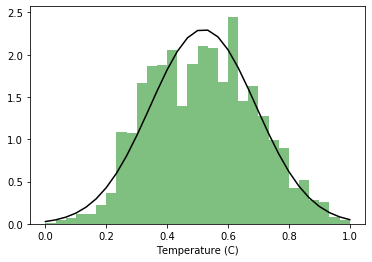

In [146]:
_, bins, _ = plt.hist(df_normalized['Temperature (C)'], bins = 30, density=1, alpha = 0.5, facecolor='green')
mu, sigma = scipy.stats.norm.fit(df_normalized['Temperature (C)'])
best_fit_line = scipy.stats.norm.pdf(bins, mu, sigma)
plt.xlabel('Temperature (C)')
plt.plot(bins, best_fit_line, color = 'black')

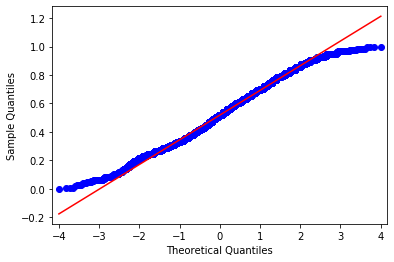

In [147]:
qqplot(df_normalized['Temperature (C)'], line = 's')
plt.show()

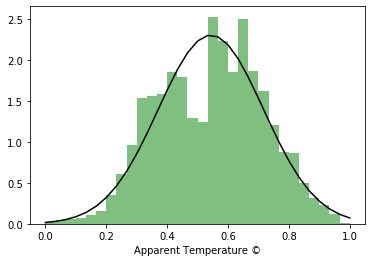

In [148]:
_, bins, _ = plt.hist(df_normalized['Apparent Temperature ©'], 30, density=1, alpha = 0.5, facecolor='green')
mu, sigma = scipy.stats.norm.fit(df_normalized['Apparent Temperature ©'])
best_fit_line = scipy.stats.norm.pdf(bins, mu, sigma)
plt.xlabel('Apparent Temperature ©')
plt.plot(bins, best_fit_line, color = 'black')

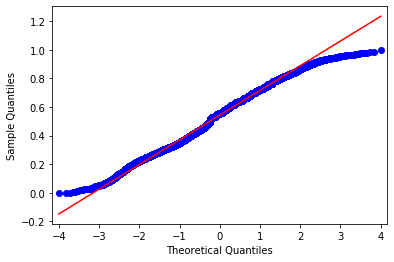

In [149]:
qqplot(df_normalized['Apparent Temperature ©'], line = 's')
plt.show()

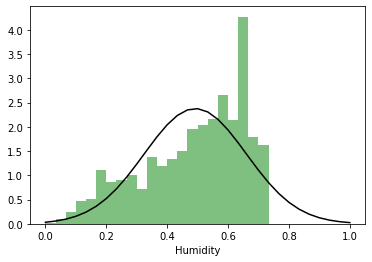

In [150]:
_, bins, _ = plt.hist(df_normalized['Humidity'], 30, density=1, alpha = 0.5, facecolor='green')
mu, sigma = scipy.stats.norm.fit(df_normalized['Humidity'])
best_fit_line = scipy.stats.norm.pdf(bins, mu, sigma)
plt.xlabel('Humidity')
plt.plot(bins, best_fit_line, color = 'black')

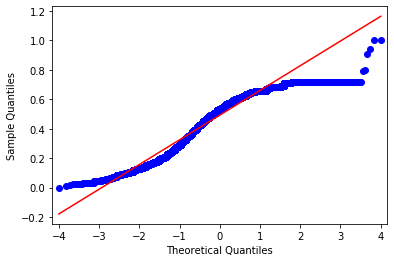

In [151]:
qqplot(df_normalized['Humidity'], line = 's')
plt.show()

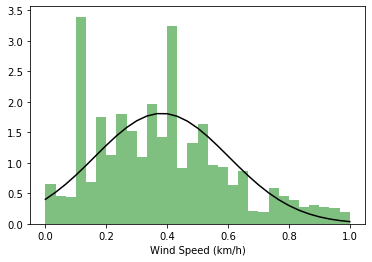

In [152]:
_, bins, _ = plt.hist(df_normalized['Wind Speed (km/h)'], 30, density=1, alpha = 0.5, facecolor='green')
mu, sigma = scipy.stats.norm.fit(df_normalized['Wind Speed (km/h)'])
best_fit_line = scipy.stats.norm.pdf(bins, mu, sigma)
plt.xlabel('Wind Speed (km/h)')
plt.plot(bins, best_fit_line, color = 'black')

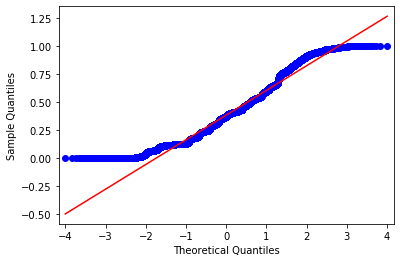

In [153]:
qqplot(df_normalized['Wind Speed (km/h)'], line = 's')
plt.show()

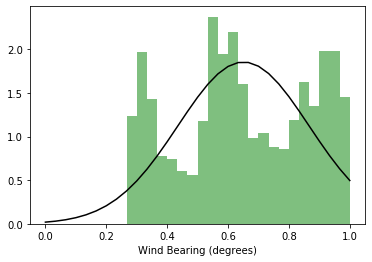

In [154]:
_, bins, _ = plt.hist(df_normalized['Wind Bearing (degrees)'], 30, density=1, alpha = 0.5, facecolor='green')
mu, sigma = scipy.stats.norm.fit(df_normalized['Wind Bearing (degrees)'])
best_fit_line = scipy.stats.norm.pdf(bins, mu, sigma)
plt.xlabel('Wind Bearing (degrees)')
plt.plot(bins, best_fit_line, color = 'black')

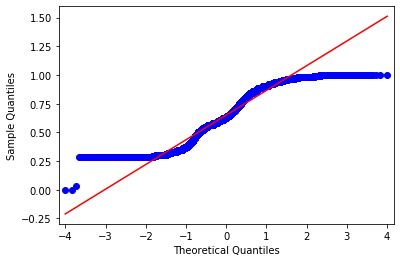

In [155]:
qqplot(df_normalized['Wind Bearing (degrees)'], line = 's')
plt.show()

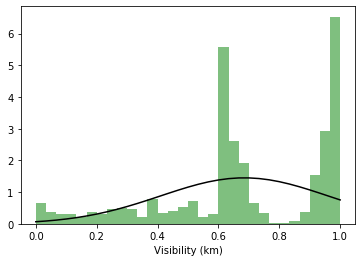

In [156]:
_, bins, _ = plt.hist(df_normalized['Visibility (km)'], 30, density=1, alpha = 0.5, facecolor='green')
mu, sigma = scipy.stats.norm.fit(df_normalized['Visibility (km)'])
best_fit_line = scipy.stats.norm.pdf(bins, mu, sigma)
plt.xlabel('Visibility (km)')
plt.plot(bins, best_fit_line, color = 'black')

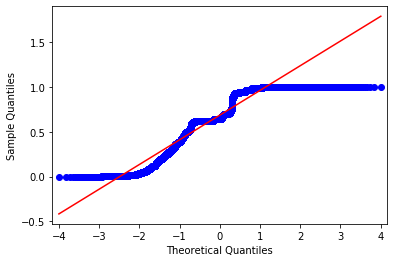

In [157]:
qqplot(df_normalized['Visibility (km)'], line = 's')
plt.show()

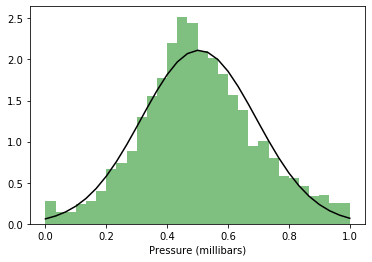

In [158]:
_, bins, _ = plt.hist(df_normalized['Pressure (millibars)'], 30, density=1, alpha = 0.5, facecolor='green')
mu, sigma = scipy.stats.norm.fit(df_normalized['Pressure (millibars)'])
best_fit_line = scipy.stats.norm.pdf(bins, mu, sigma)
plt.xlabel('Pressure (millibars)')
plt.plot(bins, best_fit_line, color = 'black')

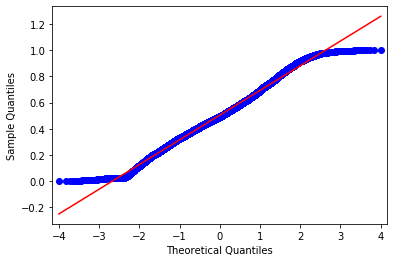

In [159]:
qqplot(df_normalized['Pressure (millibars)'], line = 's')
plt.show()

## Skewness and Kurtosis

In [160]:
from scipy.stats import kurtosis, skew

def skew_kurt(sample):
    skewness = skew(sample)
    kurt = kurtosis(sample)
    r_skew = round(skewness)
    r_kurt = round(kurt)
    print(f'skewness = {skewness}')
    if r_skew == 0:
        print("The data is symetrically distributed\n")
    elif r_skew < 0:
        print("The data is asymetrically distributed and is negatively skewed\n")
    else:
        print("The data is asymetrically distributed and is positively skewed\n")
    
    print(f'kurtosis = {kurt}')
    if r_kurt == 0:
        print("Data is Mesokurtic")
    elif r_kurt < 0:
        print("Data is Platykurtic")
    else:
        print("Data is Leptokurtic")

### 1. Temperature

In [161]:
skew_kurt(df['Temperature (C)'])

skewness = 0.09727660401285382
The data is symetrically distributed

kurtosis = -0.5354875625606428
Data is Platykurtic


### 2. Apparent Temperature

In [162]:
skew_kurt(df['Apparent Temperature ©'])

skewness = -0.09195848431308433
The data is symetrically distributed

kurtosis = -0.595799157129048
Data is Platykurtic


### 3. Humidity

In [163]:
skew_kurt(df['Humidity'])

skewness = -0.67479404106857
The data is asymetrically distributed and is negatively skewed

kurtosis = -0.5652446376113307
Data is Platykurtic


### 4. Wind Speed (km/h)

In [164]:
skew_kurt(df['Wind Speed (km/h)'])

skewness = 0.5742165967280449
The data is asymetrically distributed and is positively skewed

kurtosis = -0.15458902091592241
Data is Mesokurtic


### 5. Wind Bearing (degrees)

In [165]:
skew_kurt(df['Wind Bearing (degrees)'])

skewness = -0.09317140350121467
The data is symetrically distributed

kurtosis = -1.1475444029431208
Data is Platykurtic


### 6. Visibility (km)

In [166]:
skew_kurt(df['Visibility (km)'])

skewness = -0.6392258706452425
The data is asymetrically distributed and is negatively skewed

kurtosis = -0.3576524450165559
Data is Mesokurtic


### 7. Pressure (millibars)

In [167]:
skew_kurt(df['Pressure (millibars)'])

skewness = 0.12579403025948382
The data is symetrically distributed

kurtosis = 0.015904364811104355
Data is Mesokurtic


## Testing of Hypothesis:

### 1. For Column Temperature (C)

In [168]:
# Find sample mean and sample standard deviation
number_of_values=len(df)            # Number of values in the column
Sample_data=df["Temperature (C)"]

sample_mean=statistics.mean(Sample_data) 
sample_sd=statistics.stdev(Sample_data) 

# Hypothesis
# Null Hypothesis
# H0: The mean Temparature is 12 degree C (mu=12)
H0="The mean Temparature is 12 degree C (mu=12)"

# Alternate Hypothesis
# H1: The mean Temparature is not equal to 12 degree C (mu != 12)
H1="The mean Temparature is not equal to 12 degree C (mu != 12)"

population_mean_from_hypothesis=12

# Determining if the test is one tailed or two tailed and alloting alpha value

test="two_tailed_test"
if(test=="two_tailed_test"):
    number_of_tails=2
    alpha = 0.025
elif(test=="one_tailed_test"):
    number_of_tails=1
    alpha =0.05

# Z score
z_score=(sample_mean-population_mean_from_hypothesis)/(sample_sd/np.sqrt(number_of_values))
# p Value
p_value = scipy.stats.norm.sf(z_score) 

if p_value > alpha:
    print('Null hypothesis accepted')
    print('Accepted hypothesis is H0: ',H0)

else:
    print('Null hypothesis is rejected and alternate hypothesis is accepted')
    print('Accepted hypothesis is H1:',H1)

print('z_score=%.10f' % (z_score))
print('p_value=%.10f' % (p_value))
print('sample_mean=%.10f' % (sample_mean))
print('sample_sd=%.10f' % (sample_sd))
print('The test is '+str(number_of_tails)+' tailed test')


Null hypothesis is rejected and alternate hypothesis is accepted
Accepted hypothesis is H1: The mean Temparature is not equal to 12 degree C (mu != 12)
z_score=12.8366226481
p_value=0.0000000000
sample_mean=12.6773945042
sample_sd=9.4363265568
The test is 2 tailed test


### 2. For Column Temperature (C)

In [169]:
# Find sample mean and sample standard deviation
number_of_values=len(df)            # Number of values in the column
Sample_data=df["Temperature (C)"]

sample_mean=statistics.mean(Sample_data) 
sample_sd=statistics.stdev(Sample_data) 

# Hypothesis
# Null Hypothesis
# H0: The mean Temparature is greater than or equal to 14 degree C (mu >= 14)
H0="The mean Temparature is greater than or equal to 14 degree C (mu>=14)"

# Alternate Hypothesis
# H1: The mean Temparature is less than 14 degree C (mu < 14)
H1="The mean Temparature is less than 14 degree C (mu < 14)"

population_mean_from_hypothesis=14

# Determining if the test is one tailed or two tailed and alloting alpha value

test="one_tailed_test"
if(test=="two_tailed_test"):
    number_of_tails=2
    alpha = 0.025
elif(test=="one_tailed_test"):
    number_of_tails=1
    alpha =0.05

# Z score
z_score=(sample_mean-population_mean_from_hypothesis)/(sample_sd/np.sqrt(number_of_values))
# p Value
p_value = scipy.stats.norm.sf(z_score) 

if p_value > alpha:
    print('Null hypothesis accepted')
    print('Accepted hypothesis is H0: ',H0)

else:
    print('Null hypothesis is rejected and alternate hypothesis is accepted')
    print('Accepted hypothesis is H1:',H1)

print('z_score=%.10f' % (z_score))
print('p_value=%.10f' % (p_value))
print('sample_mean=%.10f' % (sample_mean))
print('sample_sd=%.10f' % (sample_sd))
print('The test is '+str(number_of_tails)+' tailed test')


Null hypothesis accepted
Accepted hypothesis is H0:  The mean Temparature is greater than or equal to 14 degree C (mu>=14)
z_score=-25.0633678835
p_value=1.0000000000
sample_mean=12.6773945042
sample_sd=9.4363265568
The test is 1 tailed test


### 3. For Apparent Temperature ©

In [170]:
# Find sample mean and sample standard deviation
number_of_values=len(df)            # Number of values in the column
Sample_data=df["Apparent Temperature ©"]

sample_mean=statistics.mean(Sample_data) 
sample_sd=statistics.stdev(Sample_data) 

# Hypothesis
# Null Hypothesis
# H0: The mean Apparent Temperature © is 11.5 degree © (mu=11.5)
H0="The mean Apparent Temperature © is 11.5 degree © (mu=11.5)"

# Alternate Hypothesis
# H1: The mean Apparent Temperature © is not equal to 11.5 degree © (mu != 11.5)
H1="The mean Apparent Temperature © is not equal to 11.5 degree © (mu != 11.5)"

population_mean_from_hypothesis=11.5

# Determining if the test is one tailed or two tailed and alloting alpha value

test="two_tailed_test"
if(test=="two_tailed_test"):
    number_of_tails=2
    alpha = 0.025
elif(test=="one_tailed_test"):
    number_of_tails=1
    alpha =0.05

# Z score
z_score=(sample_mean-population_mean_from_hypothesis)/(sample_sd/np.sqrt(number_of_values))
# p Value
p_value = scipy.stats.norm.sf(z_score) 

if p_value > alpha:
    print('Null hypothesis accepted')
    print('Accepted hypothesis is H0: ',H0)

else:
    print('Null hypothesis is rejected and alternate hypothesis is accepted')
    print('Accepted hypothesis is H1:',H1)
    
print('z_score=%.10f' % (z_score))
print('p_value=%.10f' % (p_value))
print('sample_mean=%.10f' % (sample_mean))
print('sample_sd=%.10f' % (sample_sd))
print('The test is '+str(number_of_tails)+' tailed test')


Null hypothesis is rejected and alternate hypothesis is accepted
Accepted hypothesis is H1: The mean Apparent Temperature © is not equal to 11.5 degree © (mu != 11.5)
z_score=4.0362562544
p_value=0.0000271554
sample_mean=11.7362310335
sample_sd=10.4657483200
The test is 2 tailed test


### 4. For Humidity

In [171]:
# Find sample mean and sample standard deviation
number_of_values=len(df)            # Number of values in the column
Sample_data=df["Humidity"]

sample_mean=statistics.mean(Sample_data) 
sample_sd=statistics.stdev(Sample_data) 

# Hypothesis
# Null Hypothesis
# H0: The mean Humidity is equal to 0.8  (mu=11.5)
H0="The mean Humidity is equal to 0.8  (mu=11.5)"

# Alternate Hypothesis
# H1: The mean Humidity is not equal to 0.8  (mu=11.5)
H1="The mean Humidity is not equal to 0.8  (mu=11.5)"

population_mean_from_hypothesis=0.8

# Determining if the test is one tailed or two tailed and alloting alpha value

test="two_tailed_test"
if(test=="two_tailed_test"):
    number_of_tails=2
    alpha = 0.025
elif(test=="one_tailed_test"):
    number_of_tails=1
    alpha =0.05

# Z score
z_score=(sample_mean-population_mean_from_hypothesis)/(sample_sd/np.sqrt(number_of_values))
# p Value
p_value = scipy.stats.norm.sf(z_score) 

if p_value > alpha:
    print('Null hypothesis accepted')
    print('Accepted hypothesis is H0: ',H0)

else:
    print('Null hypothesis is rejected and alternate hypothesis is accepted')
    print('Accepted hypothesis is H1:',H1)
    
print('z_score=%.10f' % (z_score))
print('p_value=%.10f' % (p_value))
print('sample_mean=%.10f' % (sample_mean))
print('sample_sd=%.10f' % (sample_sd))
print('The test is '+str(number_of_tails)+' tailed test')


Null hypothesis accepted
Accepted hypothesis is H0:  The mean Humidity is equal to 0.8  (mu=11.5)
z_score=-61.3674204723
p_value=1.0000000000
sample_mean=0.7309006083
sample_sd=0.2013485115
The test is 2 tailed test


## Chi-square test for independence

### Chi square test for Daily Summary and Precip Type

In [172]:
from scipy.stats import chi2_contingency
contingency_data = pd.crosstab(df['Daily Summary'], df['Precip Type'],margins = False)
stat, p, dof, expected = chi2_contingency(contingency_data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('independent categories')
else:
    print('dependent categories')

stat=5938.256, p=0.000
dependent categories


### Chi square test for Summary and Precip Type

In [173]:
from scipy.stats import chi2_contingency
contingency_data = pd.crosstab(df['Summary'], df['Precip Type'],margins = False)
stat, p, dof, expected = chi2_contingency(contingency_data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('independent categories')
else:
    print('dependent categories')

stat=2074.413, p=0.000
dependent categories


### Chi square test for Daily Summary and Summary

In [174]:
from scipy.stats import chi2_contingency
contingency_data = pd.crosstab(df['Daily Summary'], df['Summary'],margins = False)
stat, p, dof, expected = chi2_contingency(contingency_data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('independent categories')
else:
    print('dependent categories')

stat=52310.475, p=0.000
dependent categories


# Correlation Test - Pearson Correlation

In [175]:
# Creating a function to find out if samples are correlated or not

def corr_test_Pearson(FirstSample,SecondSample):
    
    from scipy.stats import pearsonr
    correlation_const, p_value = pearsonr(FirstSample, SecondSample)

    # Conclusions on the data if they are dependent or independent using p-value
    print('correlation coefficient=%.5f, p=%5f' % (correlation_const, p_value))
    if p_value > 0.05:
        print('independent samples')
    else:
        print('dependent samples')

    # Conclusions on correlation constant
    if(correlation_const>0.6 and p_value < 0.05):
        print("The given First and Second sample are positively correlated.")
    elif(correlation_const<-0.6 and p_value < 0.05):
        print("The given First and Second sample are negatively correlated.")
    else:
        print("The given First and Second sample are not correlated.")

### 1.Correlation test on Temperature (C) and Apparent Temperature ©

In [176]:
# Performing the check for correlation 
corr_test_Pearson(df['Temperature (C)'],df['Apparent Temperature ©'])

correlation coefficient=0.99075, p=0.000000
dependent samples
The given First and Second sample are positively correlated.


### 2.Correlation test on Temperature (C) and Humidity

In [177]:
# Performing the check for correlation 
corr_test_Pearson(df['Temperature (C)'],df['Humidity'])

correlation coefficient=-0.63808, p=0.000000
dependent samples
The given First and Second sample are negatively correlated.


### 3.Correlation test on Temperature (C) and Wind Speed (km/h)

In [178]:
# Performing the check for correlation 
corr_test_Pearson(df['Temperature (C)'],df['Wind Speed (km/h)'])

correlation coefficient=0.02104, p=0.000169
dependent samples
The given First and Second sample are not correlated.


### 4.Correlation test on Temperature (C) and Wind Bearing (degrees)

In [179]:
# Performing the check for correlation 
corr_test_Pearson(df['Temperature (C)'],df['Wind Bearing (degrees)'])

correlation coefficient=0.03307, p=0.000000
dependent samples
The given First and Second sample are not correlated.


### 5.Correlation test on Temperature (C) and Visibility (km)	

In [180]:
# Performing the check for correlation 
corr_test_Pearson(df['Temperature (C)'],df['Visibility (km)'])

correlation coefficient=0.39609, p=0.000000
dependent samples
The given First and Second sample are not correlated.


### 6.Correlation test on Temperature (C) and Pressure (millibars)

In [181]:
# Performing the check for correlation 
corr_test_Pearson(df['Temperature (C)'],df['Pressure (millibars)'])

correlation coefficient=-0.30164, p=0.000000
dependent samples
The given First and Second sample are not correlated.


### 7.Correlation test on Humidity and Wind Speed (km/h)

In [182]:
# Performing the check for correlation 
corr_test_Pearson(df['Temperature (C)'],df['Wind Speed (km/h)'])

correlation coefficient=0.02104, p=0.000169
dependent samples
The given First and Second sample are not correlated.


### Correlation Graph

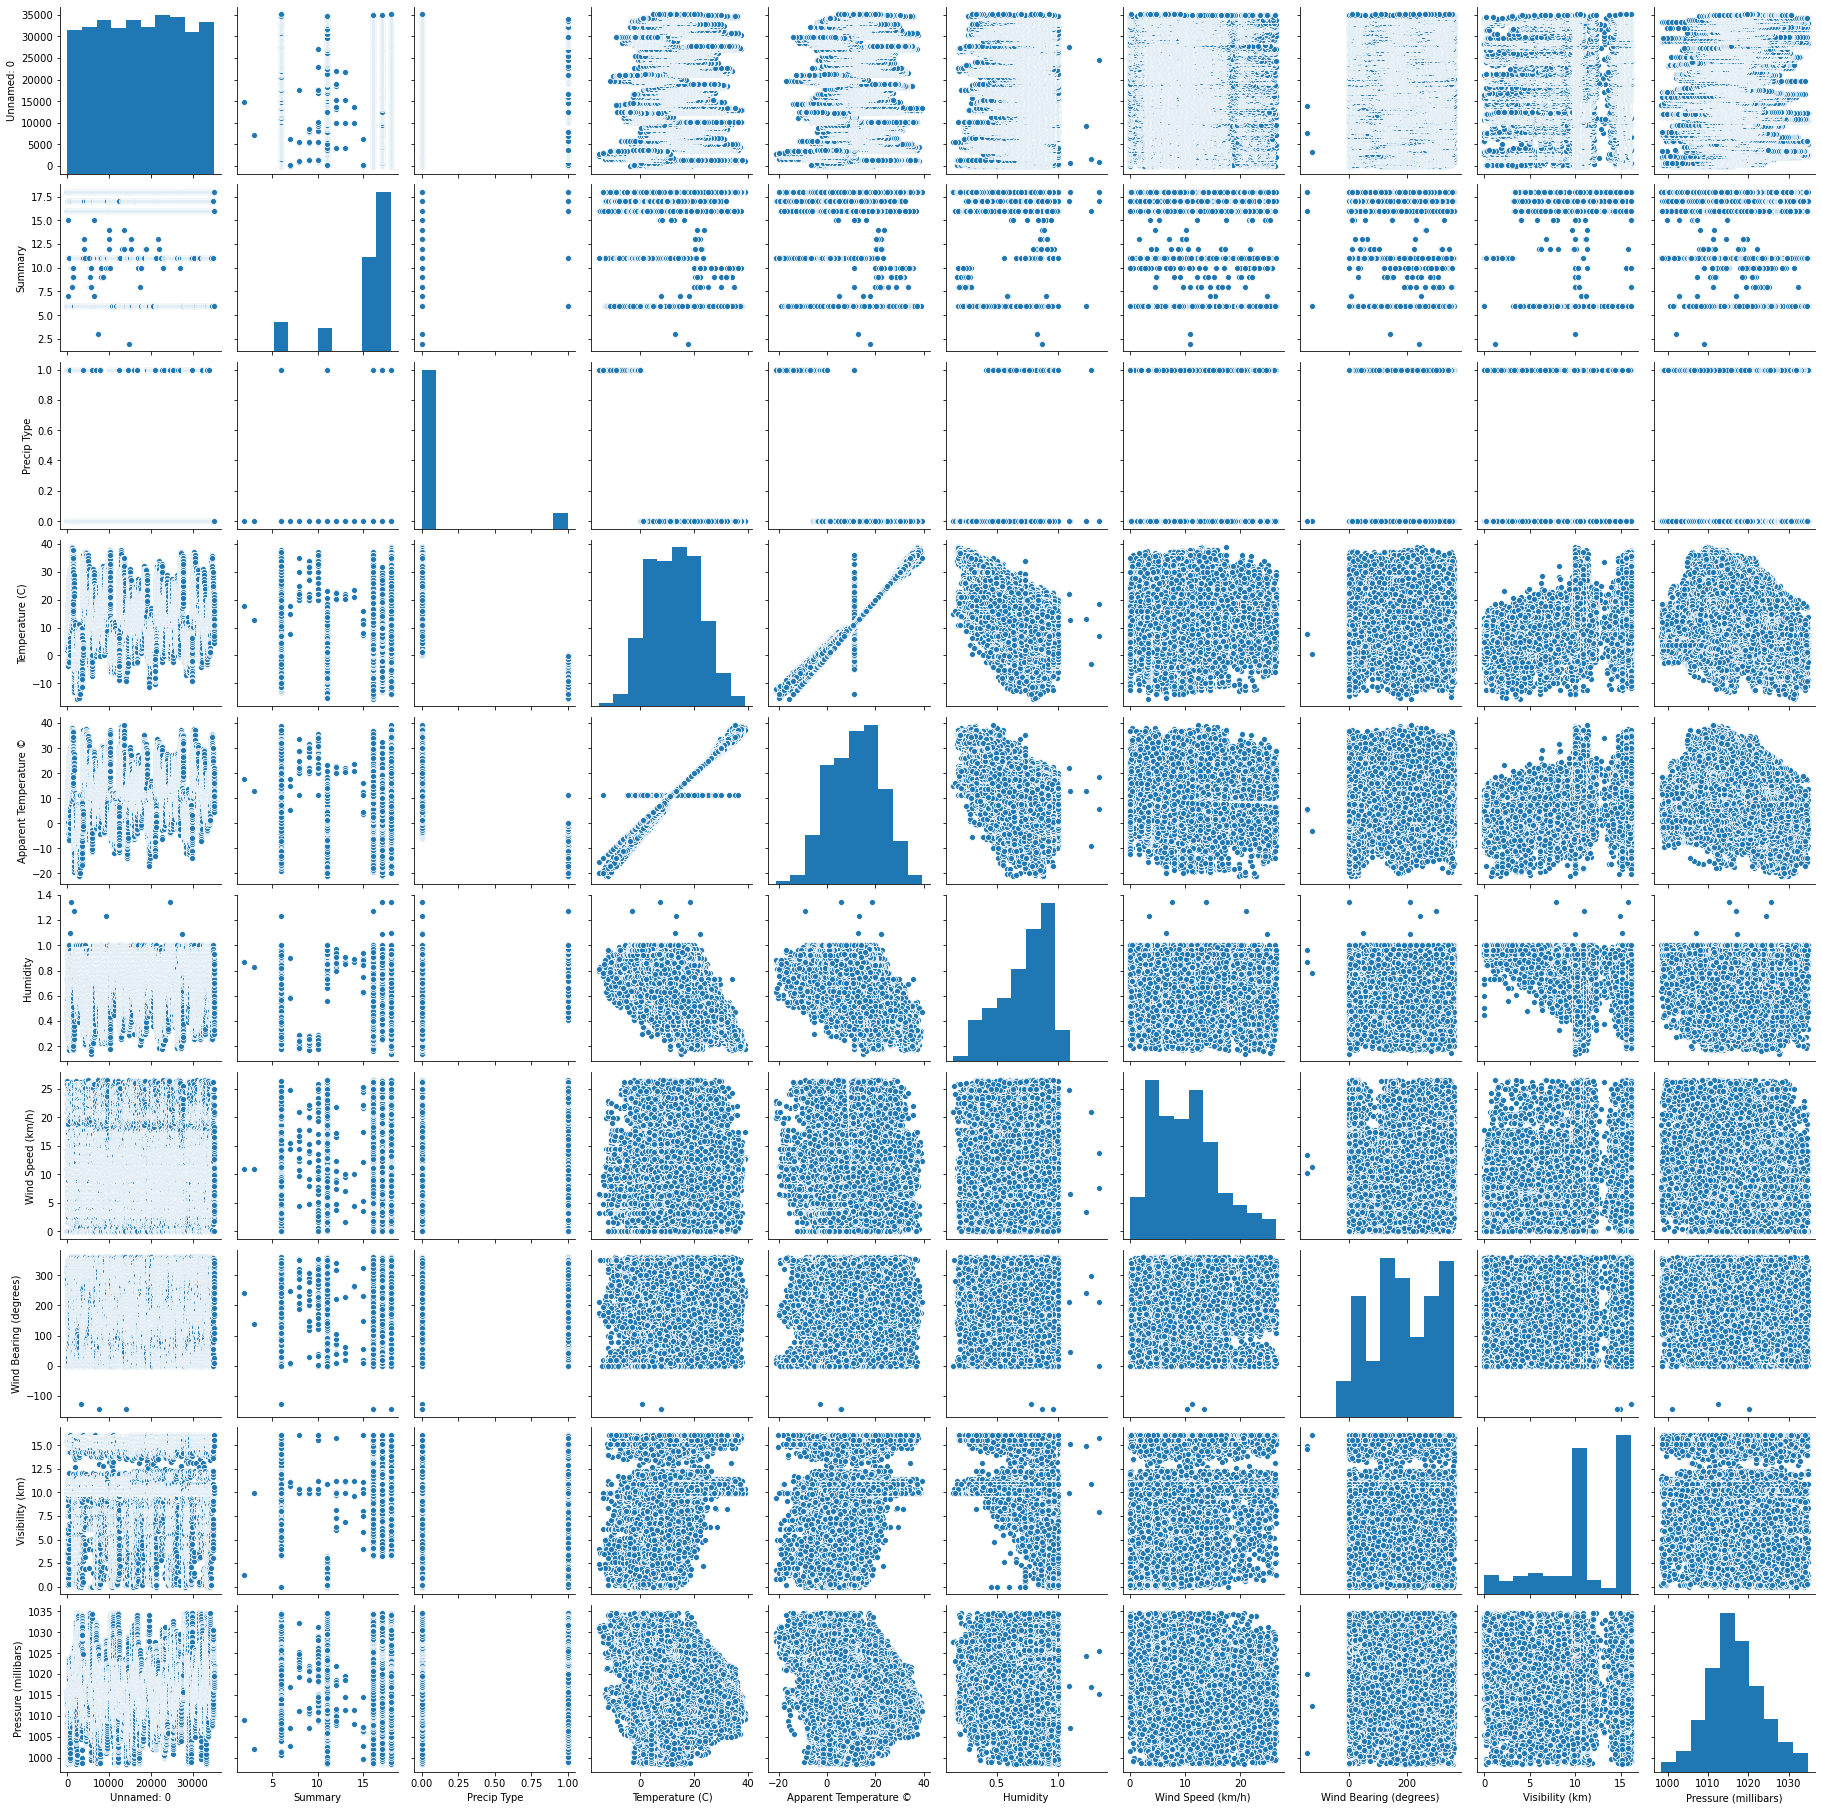

In [77]:
# Plotting the correlation graphs 

sns.pairplot(df)
plt.show()

## Feature Selection:

In [183]:
# Selecting the features that will help in prediction

features = ['Apparent Temperature ©','Humidity','Wind Speed (km/h)','Wind Bearing (degrees)','Visibility (km)','Pressure (millibars)']
X = df_normalized[features] 
y = df_normalized["Temperature (C)"]

## Linear Regression:

In [184]:
# split data into training set and test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

In [185]:
# Function to fit simple linear regression to training set 

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

def LinearReg(X_train,X_test):
    
    regressor = LinearRegression()
    regressor.fit(X_train, y_train)

    # Predicting the test set results
    y_pred = regressor.predict(X_test)
    
    # Plotting the graph showing the best fit predicted values
    plt.scatter(X_test, y_test, color = 'blue')
    plt.plot(X_test, y_pred, color = 'red')
    plt.show()

### 1. Performing Linear Regression on Apparent Temperature © as independent and Temperature as dependent variable

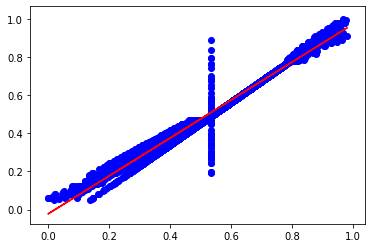

In [186]:
LinearReg(X_train['Apparent Temperature ©'].values.reshape(-1,1),X_test['Apparent Temperature ©'].values.reshape(-1,1))

### 2. Performing Linear Regression on Humidity as independent and Temperature as dependent variable

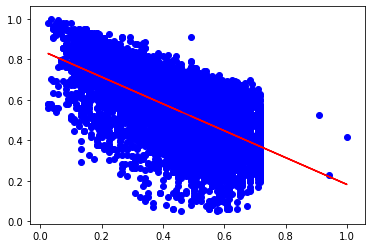

In [187]:
LinearReg(X_train['Humidity'].values.reshape(-1,1),X_test['Humidity'].values.reshape(-1,1))

### 3. Performing Linear Regression on Wind Speed (km/h) as independent and Temperature as dependent variable

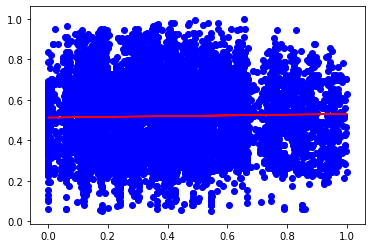

In [188]:
LinearReg(X_train['Wind Speed (km/h)'].values.reshape(-1,1),X_test['Wind Speed (km/h)'].values.reshape(-1,1))

### 4. Performing Linear Regression on Wind Bearing (degrees) as independent and Temperature as dependent variable

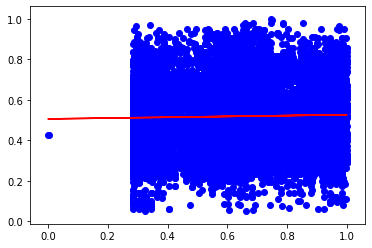

In [189]:
LinearReg(X_train['Wind Bearing (degrees)'].values.reshape(-1,1),X_test['Wind Bearing (degrees)'].values.reshape(-1,1))

### 5. Performing Linear Regression on Visibility (km) as independent and Temperature as dependent variable

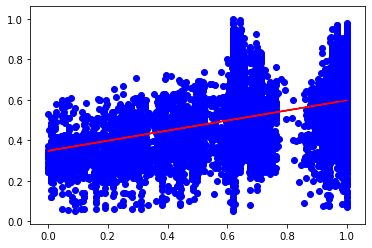

In [190]:
LinearReg(X_train['Visibility (km)'].values.reshape(-1,1),X_test['Visibility (km)'].values.reshape(-1,1))

### 6. Performing Linear Regression on Pressure (millibars) as independent and Temperature as dependent variable

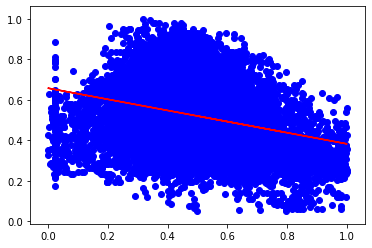

In [191]:
LinearReg(X_train['Pressure (millibars)'].values.reshape(-1,1),X_test['Pressure (millibars)'].values.reshape(-1,1))

## Performing Linear regression with all the features selected

In [192]:
# Fitting simple linear regression to training set
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicting the test set results
y_pred = regressor.predict(X_test)

Since we cannot plot a scatter plot for X variable which contains all the features , therefore we cannot visualise a graph and check the best predicted values. Therefore, we have found the root mean squared error to get an idea about how good the prediction is by including all the useful features.

In [193]:
# Finding the error in the prediction , lower the error better the accuracy

from sklearn.metrics import mean_squared_error
score = math.sqrt(mean_squared_error(y_test, y_pred))

score

0.020752525044044453